In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import numpy as np
import pandas as pd
dir_path = "/content/drive/MyDrive/AI Inspirit/COVID DATASETS"
df = pd.read_csv(dir_path + '/merged_dataset1.csv')


Mounted at /content/drive


In [ ]:
import torch
import torch.nn as nn

In [ ]:
df.shape


(1048894, 35)

In [ ]:
sample_df = df.sample(n=1_000_000, replace=False)
#sample_df = df

In [ ]:
sample_df.shape

(1000000, 35)

In [ ]:
sample_df.head()

,CBC/CRP,Diabetes,Asthma,Heart disease,kidney disease,Respiratory disease,Cancer,Corticosteroids,HEM,Immunodeficiency,...,Eczema,Vertigo,Nausea/Diarrhea,Death,AGE,SEX,PNEUMONIA,COPD,HIPERTENSION,OBESITY
0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,41.77565,0.500741,0.135621,0.014406,0.155651,0.152855
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,41.77565,0.500741,0.135621,0.014406,0.155651,0.152855
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,41.77565,0.500741,0.135621,0.014406,0.155651,0.152855
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,41.77565,0.500741,0.135621,0.014406,0.155651,0.152855
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,41.77565,0.500741,0.135621,0.014406,0.155651,0.152855


https://www.geeksforgeeks.org/data-normalization-with-pandas/

for column in df_min_max_scaled.columns:
    df_min_max_scaled[column] = (df_min_max_scaled[column] - df_min_max_scaled[column].min()) / (df_min_max_scaled[column].max() - df_min_max_scaled[column].min())    

to use min-max normalization:

normalized_df=(df-df.min())/(df.max()-df.min())

Edit: To address some concerns, need to say that Pandas automatically applies colomn-wise function in the code above.

In [ ]:
# (min-max) normalizing data
for column in sample_df.columns:
    sample_df[column] = (sample_df[column] - sample_df[column].min()) / (sample_df[column].max() - sample_df[column].min())


In [ ]:
sample_df.head()

,CBC/CRP,Diabetes,Asthma,Heart disease,kidney disease,Respiratory disease,Cancer,Corticosteroids,HEM,Immunodeficiency,...,Eczema,Vertigo,Nausea/Diarrhea,Death,AGE,SEX,PNEUMONIA,COPD,HIPERTENSION,OBESITY
215669,0.470219,0.0,0.0,0.0,0.0,0.087774,0.034483,0.003135,0.015674,0.0,...,0.009404,0.034483,0.037618,0.0,0.223140,0.0,0.0,0.0,0.0,0.0
769166,0.470219,0.0,0.0,0.0,0.0,0.087774,0.034483,0.003135,0.015674,0.0,...,0.009404,0.034483,0.037618,0.0,0.214876,1.0,0.0,0.0,0.0,0.0
1044916,0.470219,0.0,0.0,0.0,0.0,0.087774,0.034483,0.003135,0.015674,0.0,...,0.009404,0.034483,0.037618,0.0,0.264463,0.0,0.0,0.0,0.0,0.0
606641,0.470219,0.0,0.0,0.0,0.0,0.087774,0.034483,0.003135,0.015674,0.0,...,0.009404,0.034483,0.037618,0.0,0.338843,0.0,0.0,0.0,0.0,1.0
779079,0.470219,1.0,0.0,0.0,0.0,0.087774,0.034483,0.003135,0.015674,0.0,...,0.009404,0.034483,0.037618,0.0,0.454545,1.0,0.0,0.0,0.0,0.0


In [ ]:
from sklearn.model_selection import train_test_split
#determining train and test split
train_df, test_df = train_test_split(sample_df, test_size = 0.2, random_state = 1) #0.2 means 20% will be the test size

In [ ]:
from imblearn.over_sampling import SMOTE
#with smote
#smote = SMOTE(sampling_strategy='minority')
#X = train_df.drop("Death", axis=1)
#y = train_df["Death"]
#X_resampled, y_resampled = smote.fit_resample(X, y)
#assert X_resampled.shape[0] > X.shape[0]
#without smote
X = train_df.drop("Death", axis=1)
y = train_df['Death']

In [ ]:
X_test = test_df.drop("Death", axis=1)
y_test = test_df['Death']

In [ ]:
from torch.utils.data import Dataset
class MyDataset(Dataset):
  def __init__(self, x, y):
    self.x_train = torch.tensor(x, dtype=torch.float)
    self.y_train = torch.tensor(y, dtype=torch.float)
    pass

  def __len__(self):
    return len(self.y_train)

  def __getitem__(self, idx):
    return self.x_train[idx], self.y_train[idx]

In [ ]:
from torch.utils.data import DataLoader
#train_Dataset = MyDataset(X_resampled.values, y_resampled.values)
train_Dataset = MyDataset(X.values, y.values)

BATCH_SIZE = 512 #you usually want you batch size to be a power of 2
train_loader = DataLoader(train_Dataset, batch_size=BATCH_SIZE, shuffle=True)

In [ ]:
for i, (data, labels) in enumerate(train_loader):
  print(data.shape, labels.shape) #data is inputs, labels is outputs
  #print(data,labels)
  break

torch.Size([512, 34]) torch.Size([512])


In [ ]:
a = torch.tensor([100])
a = a.unsqueeze(dim = 0)
print(a)
print(a.shape)

tensor([[100]])
torch.Size([1, 1])


In [ ]:
print(len(X.columns))

34


In [ ]:
import torch
import torch.nn as nn

In [ ]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        #layers
        self.fc1 = nn.Linear(34, 1024)
        self.fc2 = nn.Linear(1024,512)
        self.fc3 = nn.Linear(512,256)
        self.fc4 = nn.Linear(256, 128)
        self.fc5 = nn.Linear(128, 64)
        self.fc6 = nn.Linear(64, 32)
        self.fc7 = nn.Linear(32, 1)


        self.dropout = nn.Dropout(0.2) #dropout is only used during training not evaluation
        #Dropout is a technique where randomly selected neurons are ignored during training. They are “dropped out” randomly. Therefore neurons that are left get 'stronger' to compensate for the 'dropped out' neurons.

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.dropout(x) #self.training only applied to training not evaluation
        x = torch.relu(self.fc2(x))
        x = self.dropout(x)
        x = torch.relu(self.fc3(x))
        x = self.dropout(x)
        x = torch.relu(self.fc4(x))
        x = self.dropout(x)
        x = torch.relu(self.fc5(x))
        x = self.dropout(x)
        x = torch.relu(self.fc6(x))
        x = self.dropout(x)
        x = torch.sigmoid(self.fc7(x))

        return x

In [ ]:
# create an instance of the neural network model
model = Net()

# define the loss function and optimizer
loss_fn = nn.BCELoss()
LR = 1e-3  #1e-4 = 1 x 10^(-4) #1.5e-4 #3e-4 #2.5e-3 #1e-3
optimizer = torch.optim.AdamW(model.parameters(), lr=LR)

In [ ]:
losses = []
#plot losses at the end

In [ ]:

# train the model
EPOCHS = 9
model.train() #lets the model know that its training and so be using dropouts
for epoch in range(EPOCHS):
  print(epoch)
  epoch_loss = 0
  num_examples = 0
  for x, y in train_loader:
    ## FORWARD PASS

    model_output = model(x)
    model_output = model_output.squeeze(1)  #output: BATCH_SIZE x 1 – squeeze → output: BATCH_SIZE-> [512]
    loss = loss_fn(model_output, y)
    losses.append(loss.item())

    ## BACKPROPAGATION
    optimizer.zero_grad() ## zeroes out gradients that will be accumulated
    loss.backward()

    ## UPDATE ALL PARAMETERS
    optimizer.step()

    num_examples = num_examples + 1

    if num_examples % 500 == 0:
      print(loss.item())

0
0.19090446829795837
0.14727440476417542
0.1693788319826126
1
0.1973208785057068
0.14139088988304138
0.12404532730579376
2
0.15126121044158936
0.14387142658233643
0.14173418283462524
3
0.15622447431087494
0.15511517226696014
0.15550021827220917
4
0.16575655341148376
0.16263380646705627
0.19499140977859497
5
0.13750046491622925
0.13849800825119019
0.18934914469718933
6
0.19175849854946136
0.11855148524045944
0.15308669209480286
7
0.20950280129909515
0.12988971173763275
0.15280407667160034
8
0.1470189243555069
0.14784014225006104
0.1863866150379181


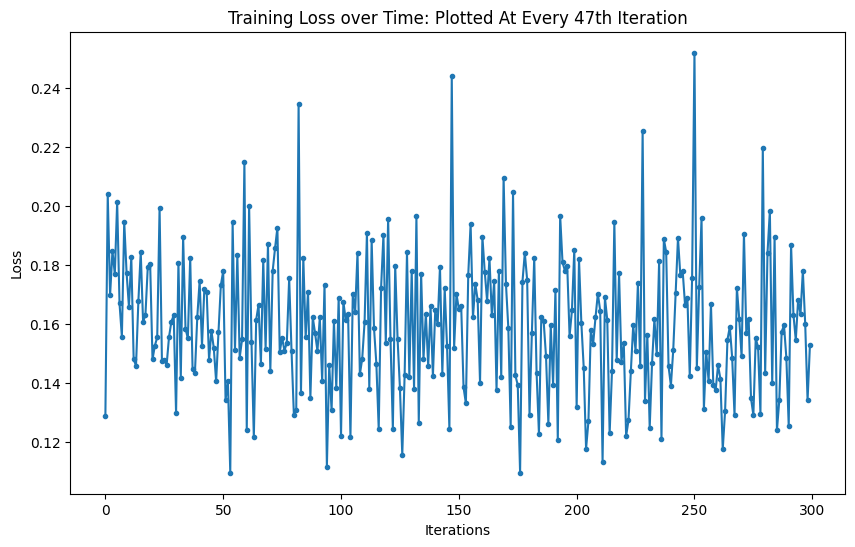

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10, 6))

n = 47 # Plot every 47th element
ax.plot(losses[::n], marker='o', markersize=3)
ax.set_xlabel('Iterations')
ax.set_ylabel('Loss')
ax.set_title('Training Loss over Time: Plotted At Every 47th Iteration')

plt.show()
#plotting without including every single datapoint to avoid overcrowding #excluding datapoints are regular intervals

In [ ]:
import os
model_path = "/content/drive/MyDrive/AI Inspirit/MODELS"
print("data_path:", model_path)
files = os.listdir(model_path)  # Get all the files in that directory
print(f"Files in current directory '{model_path}': {files}")

data_path: /content/drive/MyDrive/AI Inspirit/MODELS
Files in current directory '/content/drive/MyDrive/AI Inspirit/MODELS': ['Baseline-1-30-(800000, 34).pth', 'Baseline-2-5-(800000, 34).pth', 'Baseline-3-5-(800000, 34).pth', 'Baseline-4-5-(800000, 34).pth', 'Baseline-5-5-(839115, 34).pth', 'Baseline-6-5-(800000, 34).pth', 'Baseline-7-5-(800000, 34).pth', 'Baseline-8-6-(800000, 34)-D2.pth', 'Baseline-9-9-(800000, 34)-D2-LR0.0025.pth', 'Baseline-10-9-(800000, 34)-D2-LR0.001.pth', 'Baseline-11-6-(800000, 34)-D2-LR0.001.pth', 'Baseline-12-6-(800000, 34)-D2-LR0.0001.pth', 'Baseline-13-15-(800000, 34)-D2-LR0.001.pth', 'Baseline-14-9-(800000, 34)-D2-LR0.001.pth', 'Baseline-15-9-(800000, 34)-D2-LR0.0001.pth', 'Baseline-16-6-(800000, 34)-D2-LR0.001.pth', 'Baseline-17-20-(800000, 34)-D2-LR0.001.pth', 'Baseline-18-5-(800000, 34)-D2-LR0.0003.pth', 'Baseline-19-30-(800000, 34)-D2-LR0.0001.pth']


In [ ]:
#saving model
d = 2 # 2 means 0.2 rate
version = 20
model_name = f"Baseline-{version}-{EPOCHS}-{X.shape}-D{d}-LR{LR}.pth"

PATH = model_path + "/" + model_name

torch.save(model.state_dict(), PATH)
print(f"Saved model: {model_name}")

Saved model: Baseline-19-30-(800000, 34)-D2-LR0.0001.pth


In [ ]:
#loading model
import torch
import torch.nn as nn
model_path = "/content/drive/MyDrive/AI Inspirit/MODELS"
model_name = f"Baseline-{version}-{EPOCHS}-{X.shape}-D{d}-LR{LR}.pth"
PATH = model_path + "/" + model_name
model = Net()
model.load_state_dict(torch.load(PATH)) #loading named model from drive
model.eval() #lets model know that its evaluating and so turns off dropout

Net(
  (fc1): Linear(in_features=34, out_features=1024, bias=True)
  (fc2): Linear(in_features=1024, out_features=512, bias=True)
  (fc3): Linear(in_features=512, out_features=256, bias=True)
  (fc4): Linear(in_features=256, out_features=128, bias=True)
  (fc5): Linear(in_features=128, out_features=64, bias=True)
  (fc6): Linear(in_features=64, out_features=32, bias=True)
  (fc7): Linear(in_features=32, out_features=1, bias=True)
  (dropout): Dropout(p=0.2, inplace=False)
)

In [ ]:

from torch.utils.data import DataLoader
test_Dataset = MyDataset(X_test.values, y_test.values)

BATCH_SIZE = 64 #you usually want you batch size to be a power of 2 #changes depending on size of dataset
test_loader = DataLoader(test_Dataset, batch_size=BATCH_SIZE, shuffle=True)

In [ ]:
Y_TEST = []
Y_PRED = []

In [ ]:
total_test_loss = 0.0
test_correct = 0.0

with torch.set_grad_enabled(False):
  for x, y in test_loader:
    data, target = x, y

    y_pred = model(data)
    y_pred = y_pred.squeeze(dim=1)
    loss = loss_fn(y_pred, target)
    #print('y_pred before:', y_pred)
    y_pred = torch.tensor(np.where(y_pred < 0.5, 0, 1), dtype = torch.float)

    Y_TEST.append(target)
    Y_PRED.append(y_pred)

    #print('target:', target)
    #print('y_pred:', y_pred)

    total_test_loss += loss
    test_correct += torch.eq(y_pred, target).sum().item()
    #print('test correct:',test_correct)
    #break




In [ ]:
#converts list of tensors into one big tensor
pred_stack = torch.stack(Y_PRED, dim = 0)
target_stack = torch.stack(Y_TEST, dim = 0)
#converting tensors to pandas dataframes
pred_df = pd.DataFrame(pred_stack.numpy())
pred_df = pred_df.stack().reset_index(drop = True)
target_df = pd.DataFrame(target_stack.numpy())
target_df = target_df.stack().reset_index(drop = True)

In [ ]:
import pandas as pd

In [ ]:
print("number test correct:", test_correct)
print("total test size:", len(test_loader.dataset))

number test correct: 169939.0
total test size: 200000


In [ ]:
pred_df.head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
dtype: float32

In [ ]:
target_df.head()

0    0.0
1    0.0
2    0.0
3    1.0
4    0.0
dtype: float32

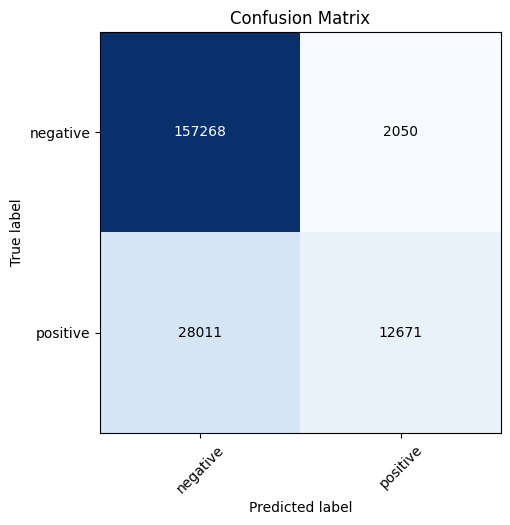

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import numpy as np
#using y_test values and the predictions made from X_test
cm = confusion_matrix(pred_df, target_df)

fig, ax = plt.subplots(figsize=(5, 5))
ax.imshow(cm, cmap=plt.cm.Blues)

class_names = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names, rotation=45)
plt.yticks(tick_marks, class_names)

thresh = cm.max() / 2.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(j, i, format(cm[i, j], 'd'), ha="center", va="center", color="white" if cm[i, j] > thresh else "black")

plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title('Confusion Matrix')

plt.show()